# Electricity Price Prediction

Name: Abiramy S

Kaggle username: abc2022

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


### Reading data

In [2]:
# Load train data

data_train = pd.read_csv('/Users/Abiramy/Documents/DAT200/CA3/data/train.csv', index_col = 0)

# Load test data

data_test = pd.read_csv('/Users/Abiramy/Documents/DAT200/CA3/data/test.csv', index_col = 0)

### Data exploration and visualisation

In [53]:
# Get information about the data

# Get the shape of the raw data

print(f'Shape of the train data is: {data_train.shape}\nShape of the test data is: {data_test.shape}\n')

# Check the top rows of the data

print(f'Train head:\n{data_train.head()}\n\nTest head:\n{data_test.head()}')


Shape of the train data is: (33994, 6)
Shape of the test data is: (11328, 5)

Train head:
       nswprice  nswdemand  vicprice  vicdemand  transfer  target
index                                                            
0      0.046445   0.378310  0.003467   0.422915  0.414912       0
1      0.037829   0.749182  0.002576   0.590368  0.557456       0
2      0.046806   0.500000  0.003467   0.422915  0.414912       0
3      0.029723   0.362838  0.001874   0.341792  0.682456       1
4      0.053080   0.500595  0.003581   0.557483  0.410088       0

Test head:
       nswprice  nswdemand  vicprice  vicdemand  transfer
index                                                    
0      0.041732   0.672865  0.003467   0.422915  0.414912
1      0.075027   0.516364  0.003467   0.422915  0.414912
2      0.070704   0.532580  0.003467   0.422915  0.414912
3      0.035007   0.688634  0.002439   0.688762  0.231140
4      0.056263   0.578697  0.003467   0.422915  0.414912


In [54]:
# Get descriptive statistics of the data

print('Train data desc. stat:')
data_train.describe()


Train data desc. stat:


,nswprice,nswdemand,vicprice,vicdemand,transfer,target
count,33994.000000,33994.000000,33994.000000,33994.000000,33994.000000,33994.000000
mean,0.057260,0.422004,0.003422,0.418636,0.496951,0.424604
std,0.052392,0.319866,0.010215,0.293709,0.288964,0.494290
min,-3.354880,-20.103552,-0.229600,-17.996896,-19.382464,0.000000
25%,0.035127,0.310213,0.002277,0.373123,0.414912,0.000000
50%,0.048667,0.444808,0.003467,0.422915,0.414912,0.000000
75%,0.074306,0.537303,0.003467,0.468863,0.605702,1.000000
max,0.979975,0.980809,1.000000,1.000000,1.000000,1.000000


The descriptive statistics of the train data indicate that there are some values below 0 for all the five features.

In [55]:
print('Test data desc. stat:')
data_test.describe()

Test data desc. stat:


,nswprice,nswdemand,vicprice,vicdemand,transfer
count,11328.000000,11328.000000,11328.000000,11328.000000,11328.000000
mean,0.057994,0.421899,0.003490,0.422103,0.499075
std,0.042773,0.163896,0.010962,0.122004,0.153778
min,0.000000,0.001488,0.000000,0.029518,0.006579
25%,0.035060,0.305378,0.002270,0.368980,0.414912
50%,0.048562,0.440345,0.003467,0.422915,0.414912
75%,0.074404,0.532170,0.003467,0.470223,0.605702
max,1.000000,1.000000,0.996228,0.996893,0.943860


In [31]:
# Check missing values in data

mv_train = data_train.isna().sum()
mv_test = data_test.isna().sum()
print(f'Number of missing values in train data:\n{mv_train}\n\nNumber of missing values in test data:\n{mv_test}\n')

Number of missing values in train data:
nswprice     0
nswdemand    0
vicprice     0
vicdemand    0
transfer     0
target       0
dtype: int64

Number of missing values in test data:
nswprice     0
nswdemand    0
vicprice     0
vicdemand    0
transfer     0
dtype: int64



train data


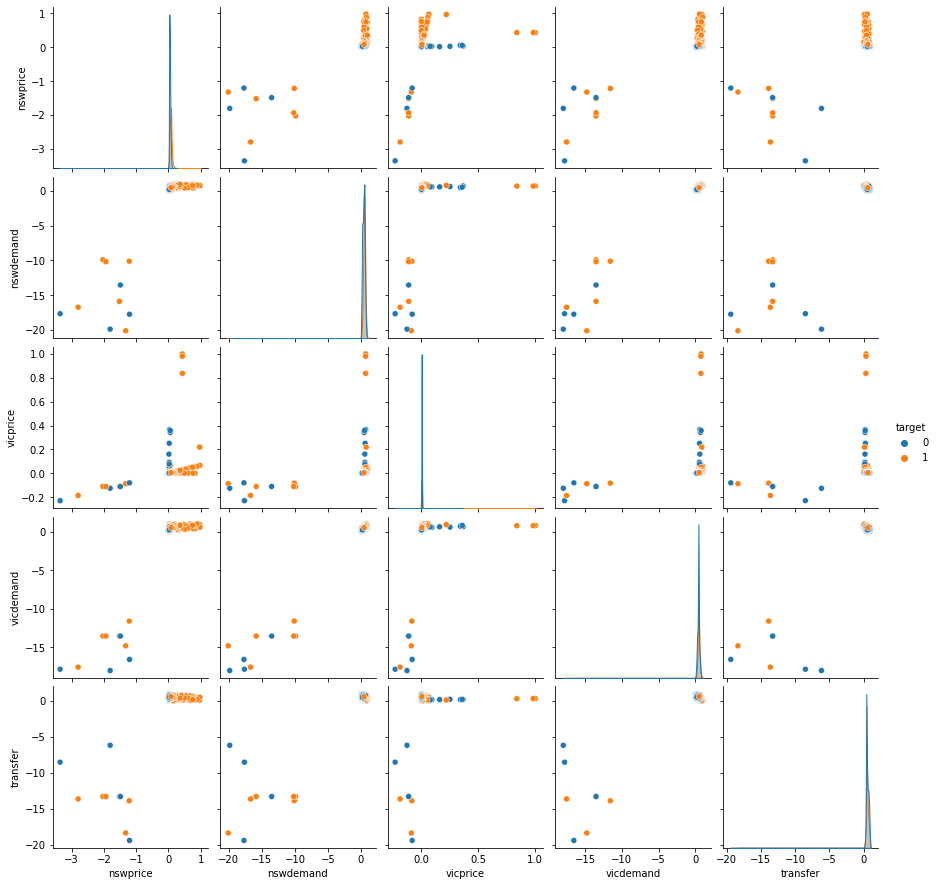

test data


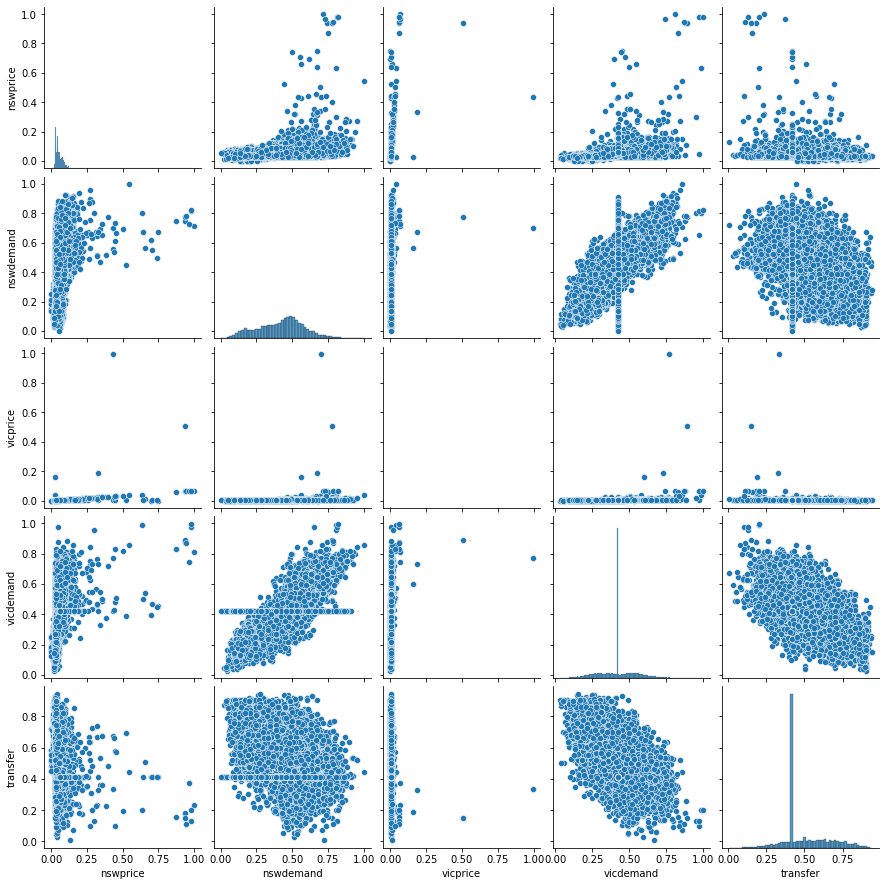

In [32]:
# Plot pairplot

print('train data')
sns.pairplot(data_train, hue = 'target')
plt.show()

print('test data')
sns.pairplot(data_test)
plt.show()

train data


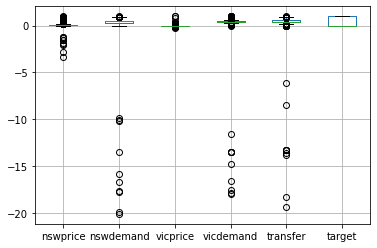


test data


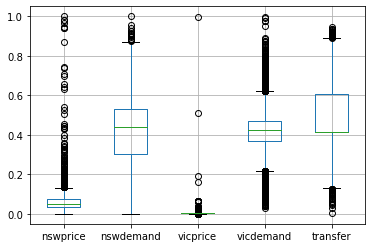

In [34]:
# Plot a boxplot to see if there are outliers in the data
print('train data')
data_train.boxplot()
plt.show()

print('\ntest data')
data_test.boxplot()
plt.show()

The boxplots indicate that there are some outliers in the data. In the train set there are some negative values as the descriptive statistics indicated. These would be removed in the data cleaning part. The outliers in the test set are within the range (0,1).

train data


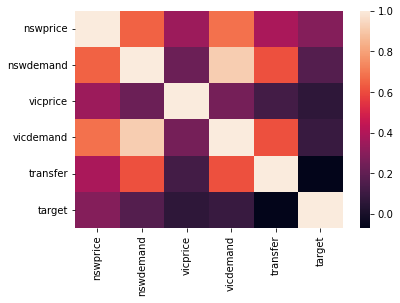

test data


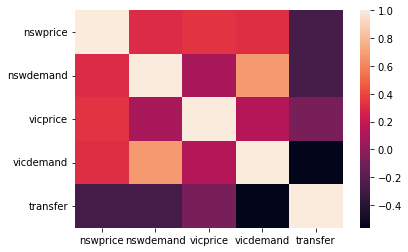

In [36]:
#Plot correlation matrix to see the correlation between the features
print('train data')
corr_train = data_train.corr()
sns.heatmap(corr_train)
plt.show()

print('test data')
corr_test = data_test.corr()
sns.heatmap(corr_test)
plt.show()

The heatmaps indicate a relatively strong correlation between the features nswdemand and vicdemand. However, these would not be left out as there are not many features in the set and by assuming that it would not harm the models much by including these.

### Data cleaning
The data exploration part indicated that the train set contained negative values. These would be removed in this part.

In [41]:
# Make a copy of the raw data set before cleaning
train_df = data_train.copy()

# Remove outliers/the rows with negative values in each column

train_df.drop(train_df.index[train_df['nswprice'] < 0], inplace = True)
train_df.drop(train_df.index[train_df['nswdemand'] < 0], inplace = True)
train_df.drop(train_df.index[train_df['vicprice'] < 0], inplace = True)
train_df.drop(train_df.index[train_df['vicdemand'] < 0], inplace = True)
train_df.drop(train_df.index[train_df['transfer'] < 0], inplace = True)

# Get the shape of data before and after cleaning

print(f'Shape of raw data: {data_train.shape}')
print(f'Shape after cleaning: {train_df.shape}')


Shape of raw data: (33994, 6)
Shape after cleaning: (33984, 6)


### Data exploration after cleaning

In [42]:
print('Desc. stat of train data after cleaning')
train_df.describe()

Desc. stat of train data after cleaning


,nswprice,nswdemand,vicprice,vicdemand,transfer,target
count,33984.000000,33984.000000,33984.000000,33984.000000,33984.000000,33984.000000
mean,0.057826,0.426591,0.003459,0.423186,0.501010,0.424553
std,0.039020,0.163117,0.009951,0.120618,0.153238,0.494282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.035157,0.310324,0.002279,0.373382,0.414912,0.000000
50%,0.048667,0.444808,0.003467,0.422915,0.414912,0.000000
75%,0.074336,0.537340,0.003467,0.468928,0.605702,1.000000
max,0.979975,0.980809,1.000000,1.000000,1.000000,1.000000


Boxplot of train data after cleaning


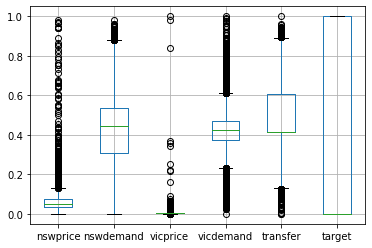

In [43]:
print('Boxplot of train data after cleaning')
f, axis = plt.subplots()
train_df.boxplot()
plt.show()


Pairplot of train data after cleaning


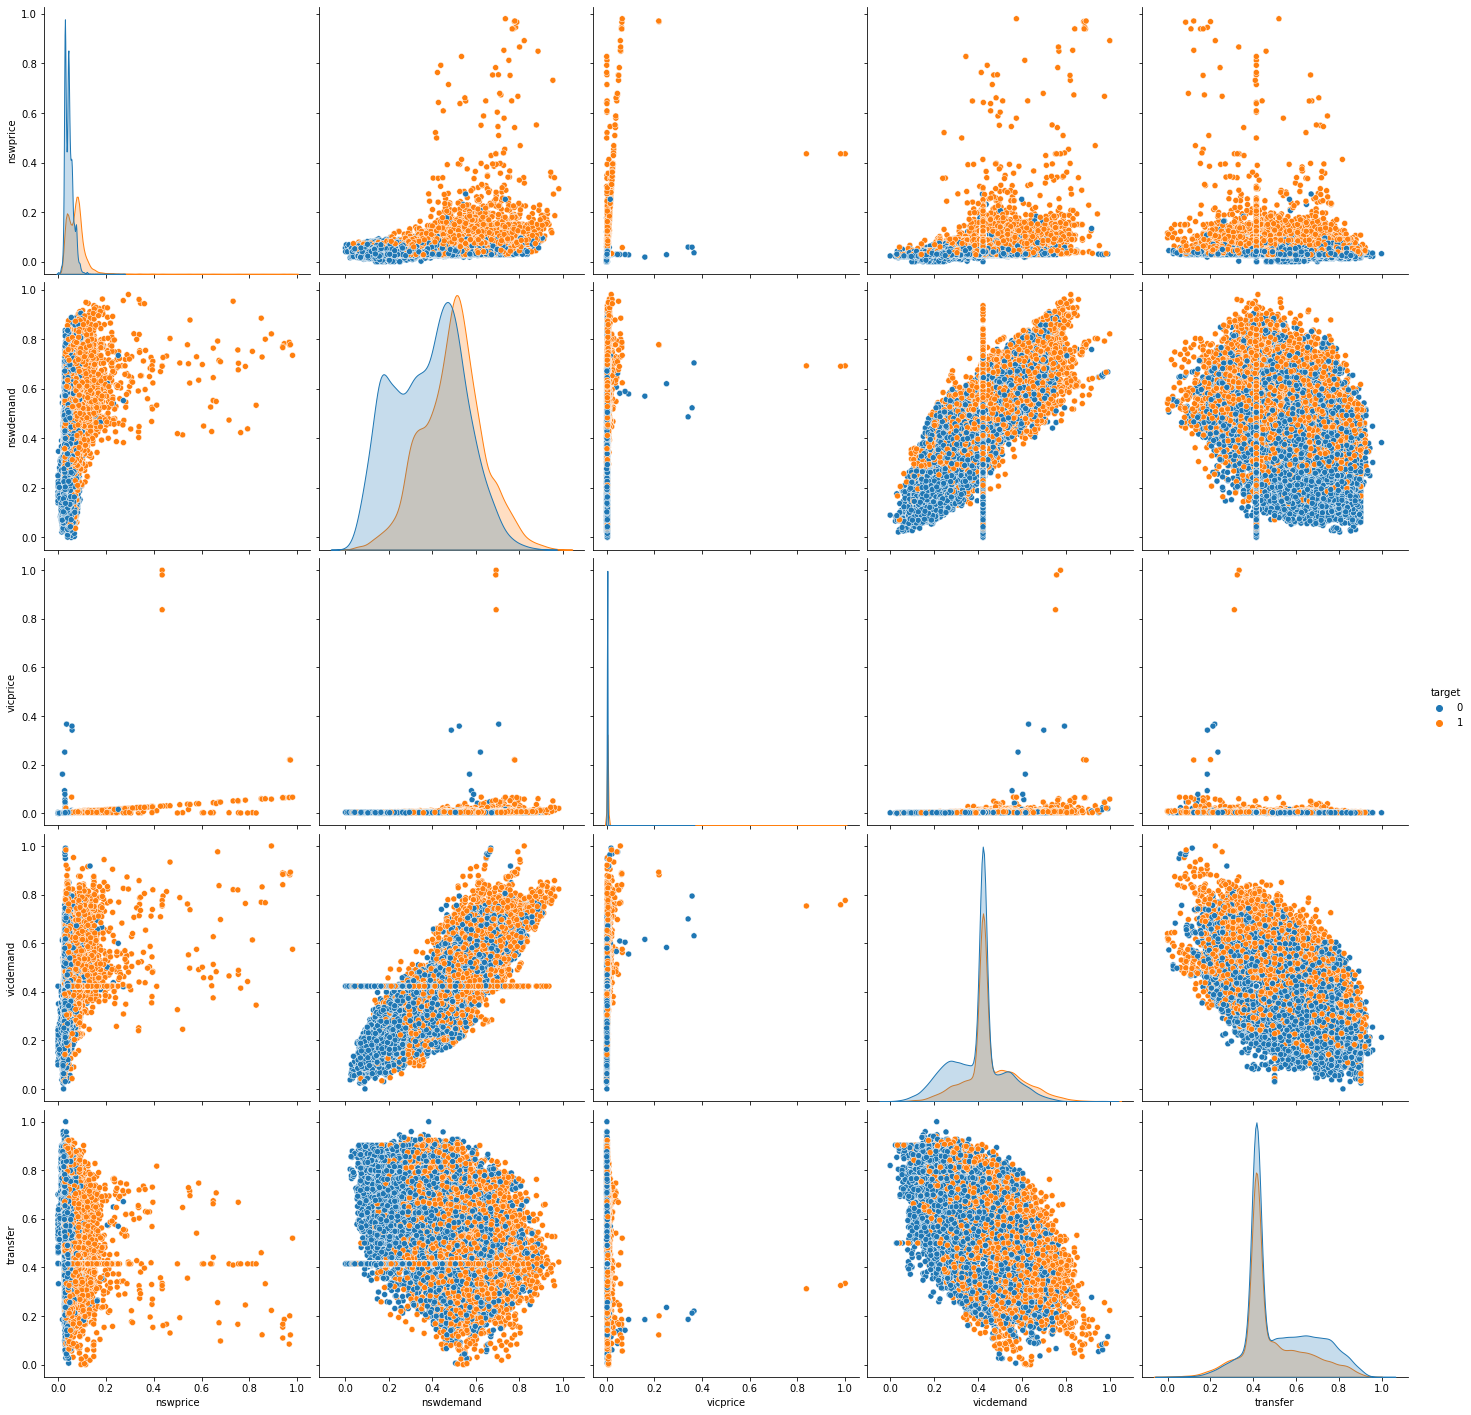

In [44]:
print('Pairplot of train data after cleaning')
sns.pairplot(train_df, hue = 'target', height = 4)
plt.show()


### Data preprocessing

#### Train test split

In [45]:
# Define the features in train data
X = train_df.iloc[:,:-1]

# Define the target in train data
y = train_df['target']

# Define the test data
X_test_data = data_test

#### Scaling


In [46]:
# Initialise standard scaler and compute mean and STD from training data
sc = StandardScaler()
sc.fit(X)
                
# Standardize both X_train and X_test with mean and STD from training data
X_train_data_sc = sc.transform(X)
X_test_data_sc = sc.transform(X_test_data)

# It is not necessary to scale the features for a random forest classifier.

### Modelling
Tuning hyperparameter n_estimator (number of trees in the forest) and max_depth (maximum depth of the tree) for Random Forest by running loops across different values of n_estimator and max_depth for 10 train and test splits. 10 splits are not optimal for the model robustness, but increasing the splits to a higher number (100 splits) led to high computational cost. 

The model is evaluated by comparing the accuracy for train and test sets for different combinations of hyperparameters (and the heatmap). 

In [20]:

# Define different values for n_estimator, max_depth and random_state

random_state = [*range(10)]
n_estimator = [*range(50,500,50)]
maximum_depth = [*range(10,150,20)]

# Create numpy arrays to store the accuracy for different combinations of paramters later

mean_train = np.zeros((len(n_estimator), len(maximum_depth)))
mean_test  = np.zeros((len(n_estimator), len(maximum_depth)))

for n_ind, n_est in enumerate(n_estimator):
    
    for d_ind, depth in enumerate (maximum_depth):
        
        # Create lists to store the accuracy scores for each split which would be used for calculating the average later
        acc_train =[]
        acc_test = []

        # Split the data into train and test sets
        
        for rs in random_state:

            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.3, random_state=rs, stratify=y)
            
            
            # Train a Random Forest classifier
            # Initialise the model
            random_forest = RandomForestClassifier(criterion='gini',
                                    n_estimators=n_est,
                                    max_depth=depth,
                                    random_state=1,
                                    n_jobs=-1)
            
            random_forest.fit(X_train, y_train)

            # Compute the accuracy for train and test sets for each split and append to the list
            acc_train.append(random_forest.score(X_train, y_train))
            acc_test.append(random_forest.score(X_test, y_test))


        # Compute average train and test accuracy for all train test splits and insert to the arrays
        acc_train_average = np.mean(acc_train)
        acc_test_average = np.mean(acc_test)
    
        mean_train[n_ind, d_ind] = acc_train_average
        mean_test[n_ind, d_ind] = acc_test_average  
        

### Evaluation
The hyperparameter evaluation is done by comparing the accuracy for different combination of the hyperparameters (n_estimator and max_depth).

In [47]:
# Convert the array with train accuracy to a DataFrame and define the rows and columns

# Create row names
row_names = ['n = {0}'.format(n_est) for n_est in n_estimator]

# Create column names
col_names = ['Maximum depth = {0}'.format(depth) for depth in maximum_depth]

train_acc_df = pd.DataFrame(mean_train, index=row_names, columns=col_names)

train_acc_df

,Maximum depth = 10,Maximum depth = 30,Maximum depth = 50,Maximum depth = 70,Maximum depth = 90,Maximum depth = 110,Maximum depth = 130
n = 50,0.816109,0.998735,0.999163,0.999163,0.999163,0.999163,0.999163
n = 100,0.816462,0.999378,0.999575,0.999575,0.999575,0.999575,0.999575
n = 150,0.816840,0.999491,0.999609,0.999609,0.999609,0.999609,0.999609
n = 200,0.816840,0.999504,0.999613,0.999613,0.999613,0.999613,0.999613
n = 250,0.817143,0.999550,0.999613,0.999613,0.999613,0.999613,0.999613
n = 300,0.817278,0.999554,0.999613,0.999613,0.999613,0.999613,0.999613
n = 350,0.817429,0.999554,0.999613,0.999613,0.999613,0.999613,0.999613
n = 400,0.817315,0.999563,0.999613,0.999613,0.999613,0.999613,0.999613
n = 450,0.817416,0.999563,0.999613,0.999613,0.999613,0.999613,0.999613


In [48]:
# Convert the array with test accuracy to a DataFrame and define the rows and columns

test_acc_df = pd.DataFrame(mean_test, index=row_names, columns=col_names)

test_acc_df

,Maximum depth = 10,Maximum depth = 30,Maximum depth = 50,Maximum depth = 70,Maximum depth = 90,Maximum depth = 110,Maximum depth = 130
n = 50,0.782572,0.799765,0.798205,0.798215,0.798215,0.798215,0.798215
n = 100,0.783052,0.800235,0.799696,0.799745,0.799745,0.799745,0.799745
n = 150,0.783189,0.800863,0.800108,0.800078,0.800078,0.800078,0.800078
n = 200,0.783386,0.800451,0.800029,0.800010,0.800010,0.800010,0.800010
n = 250,0.783366,0.800834,0.799863,0.799853,0.799853,0.799853,0.799853
n = 300,0.783395,0.801138,0.799892,0.799961,0.799961,0.799961,0.799961
n = 350,0.783827,0.800971,0.800196,0.800245,0.800245,0.800245,0.800245
n = 400,0.783788,0.800912,0.800510,0.800539,0.800539,0.800539,0.800539
n = 450,0.783650,0.800736,0.800579,0.800559,0.800559,0.800559,0.800559


The test accuracy DataFrame above (and the heatmap for test data accuracy below) indicate that the combination n_estimator = 300 & maximum depth = 30 gives the highest test accuracy of 0.801138. The train accuracy is 0.999554. These values would be used for the prediction.

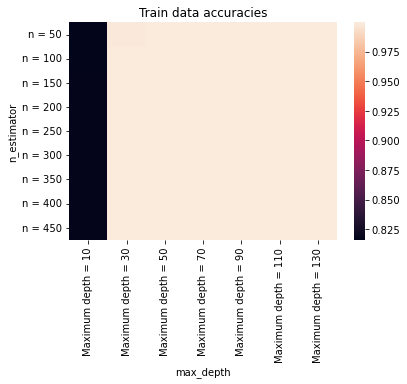

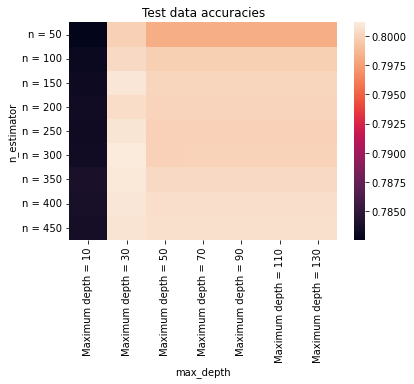

In [50]:
# Plot heatmap for train accuracies
train_acc = sns.heatmap(train_acc_df)
train_acc.set_xlabel("max_depth")
train_acc.set_ylabel("n_estimator")
train_acc.set_title('Train data accuracies')
plt.show()

# Plot heatmap for test accuracies
test_acc = sns.heatmap(test_acc_df)
test_acc.set_xlabel("max_depth")
test_acc.set_ylabel("n_estimator")
test_acc.set_title('Test data accuracies')
plt.show()


In [51]:
# Training the model with n_estimator = 300 and max_depth = 30

random_forest = RandomForestClassifier(criterion='gini',
                                    n_estimators=300,
                                    max_depth=30,
                                    random_state=1,
                                    n_jobs=-1)

random_forest.fit(X, y)



RandomForestClassifier(max_depth=30, n_estimators=300, n_jobs=-1,
                       random_state=1)

### Kaggle submission

In [52]:
# Prediction

rf_pred = random_forest.predict(X_test_data)

# Submission file

rf_result = pd.DataFrame({'target': rf_pred}, index = data_test.index.copy())
submission_rf = rf_result.to_csv('submission_randomforest_as.csv')

